In [1]:
# 적합성 검정
# 실험에서 얻어진 관측값들이 예상한 이론과 일치하는지 아닌지를 검정하는 방법
# H0(귀무가설): 실제 분포와 이론적 분포 간에는 차이가 없다.
# H1(대립가설): 실제 분포와 이론적 분포 간에는 차이가 있다.

In [2]:
# survey 데이터의 W.Hnd변수의 왼손잡이와 오른손잡이의 분할표를 생성하고 적합성 검정 수행
# H0: 전체 응답자 중 왼손잡이의 비율이 20%, 오른손잡이의 비율이 80%이다.
# H1: H0라고 할수 없다.

In [3]:
# load survey data set in Mass
# Download Mass package : https://forge.scilab.org/index.php/p/rdataset/source/tree/master/csv/MASS
import pandas as pd
survey_df = pd.read_csv('rdataset-master\csv\MASS\survey.csv')

In [4]:
# data check
print(survey_df.head())
print(survey_df.describe())

   Unnamed: 0     Sex  Wr.Hnd  NW.Hnd  W.Hnd     Fold  Pulse     Clap  Exer  \
0           1  Female    18.5    18.0  Right   R on L   92.0     Left  Some   
1           2    Male    19.5    20.5   Left   R on L  104.0     Left  None   
2           3    Male    18.0    13.3  Right   L on R   87.0  Neither  None   
3           4    Male    18.8    18.9  Right   R on L    NaN  Neither  None   
4           5    Male    20.0    20.0  Right  Neither   35.0    Right  Some   

   Smoke  Height       M.I     Age  
0  Never   173.0    Metric  18.250  
1  Regul   177.8  Imperial  17.583  
2  Occas     NaN       NaN  16.917  
3  Never   160.0    Metric  20.333  
4  Never   165.0    Metric  23.667  
       Unnamed: 0      Wr.Hnd      NW.Hnd       Pulse      Height         Age
count  237.000000  236.000000  236.000000  192.000000  209.000000  237.000000
mean   119.000000   18.669068   18.582627   74.151042  172.380861   20.374515
std     68.560193    1.878981    1.967068   11.687157    9.847528    

In [5]:
# 관찰 빈도 추출
W_Hnd_freq_2 = survey_df['W.Hnd'].value_counts() 
print(W_Hnd_freq_2)

Right    218
Left      18
Name: W.Hnd, dtype: int64


In [6]:
# 관찰빈도
x_o = [W_Hnd_freq_2.Right, W_Hnd_freq_2.Left]
# 기대빈도
count = survey_df['W.Hnd'].count() # 총 count
x_e = [int(0.8 * count), int(0.2 *count)]
# 분할표
data_df = pd.DataFrame([x_o, x_e],
    columns=['Right', 'Left'],
    index = ['Obs', 'Exp'])
data_df

,Right,Left
Obs,218,18
Exp,188,47


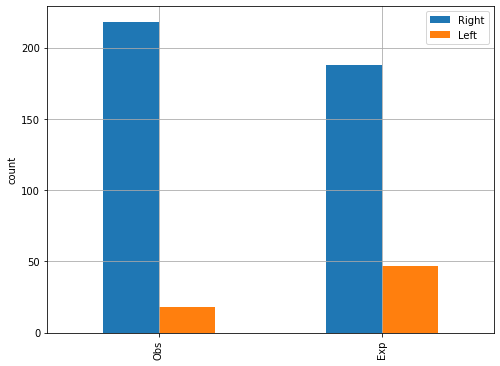

In [7]:
# bar plot을 이용하여 차이 확인
import matplotlib.pyplot as plt
%matplotlib inline
ax = data_df.plot(kind='bar', figsize=(8,6)) 
ax.set_ylabel('count') 
plt.grid(color='darkgray') 
plt.show()

In [8]:
# 일원 카이제곱 검정( one-way chi-squared test ) 적용
# 일원 카이제곱 검정 : 하나의 범주를 대상으로 한다 -> 적합성 검정
from scipy.stats import chisquare 
result = chisquare(x_o, f_exp=x_e) 
result

Power_divergenceResult(statistic=22.680851063829788, pvalue=1.9126445273349075e-06)

In [9]:
# p-value가 0.000001912로 0.05 보다 작으므로 귀무가설을 기각하고, 대립가설을 지지한다.
# H1: 전체 응답자 중 왼손잡이의 비율이 20%, 오른손잡이의 비율이 80%이라고 할 수 없다.

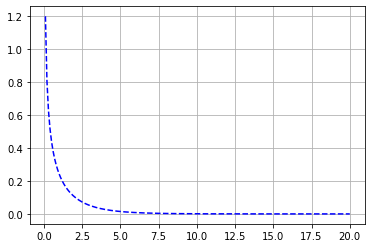

In [10]:
# 카이제곱분포의 플롯을 그려보자. 
from numpy import linspace 
from scipy.stats import chi2 
df = 1 # 자유도 
x = linspace(0, 20, 201) 
y = chi2(df).pdf(x)

plt.plot(x,y,'b--') 
plt.grid() 
plt.show()

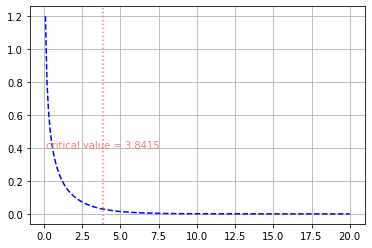

In [11]:
# 여기에서 수직선과 text를 이용하여 p-value의 위치를 표시해보자 
x95 = chi2(df).ppf(.95) 
plt.plot(x, y, 'b--') 
plt.axvline(x=x95, color='lightcoral', linestyle=':') 
plt.text(x95, .4, 'critical value = ' + str(round(x95, 4)), horizontalalignment='center',color='lightcoral') 
plt.grid() 
plt.show()
# 이 점선의 왼쪽은 귀무가설 채택 영역, 오른쪽은 귀무가설 기각 영역

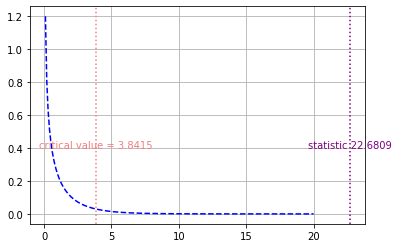

In [12]:
x95 = chi2(df).ppf(.95)
plt.plot(x, y, 'b--') 
plt.axvline(x=x95, color='lightcoral', linestyle=':') 
plt.text(x95, .4, 'critical value = ' + str(round(x95, 4)), horizontalalignment='center',color='lightcoral') 

# 위에서 구한 카이분포통계값 = result[0] 
plt.axvline(x=result[0], color='purple', linestyle=':') 
plt.text(result[0], .4, 'statistic '+ str(round(result[0], 4)), horizontalalignment='center', color='purple') 
plt.grid() 
plt.show()

In [13]:
# 통계랑은 critical value의 오른쪽에 위치하므로 귀무가설을 기각한다.